# Продвинутое машинное обучение
---
**Домашнее задание 1**

## Часть I: О теореме Байеса

## 1
Прокурор связал вероятность того, что у человека может быть выявлена редкая группа крови (p(x) = 1%) с фактом выявления редкой группы у убийцы. То есть, раз у убийцы редкая группа крови, которая встречается в 1% случаев (по мнению прокурора условная вероятность p(x|y) = p(x), значит с вероятностью 99% он убийца (по мнению прокурора p(y) = p(~x|y)). Хотя вероятность того, что у подозреваемого выявлена редкая группа крови не равна вероятности того, что подозреваемый с редкой группой крови является убийцей.

Нужно было оценить апостериорную вероятность того, что человек с данной группой крови является убийцей, то есть p(y|x).

## 2
Адвокат оценил вероятность того, что подозреваемый является убийцей как вероятность того, что среди всех жителей города с редкой группой крови есть только 1 убийца.

Ни прокурор, ни адвокат не оценили необходимые вероятности:
1. априорную вероятность p(y), того что подозреваемый является убийцей;
2. условные вероятности p(x|y) и p(x|~y) - возможно ли разное соотношение редкой группы крови у убийц и не убийц;
3. апостериорную вероятность p(y/x), которая и была бы правильным ответом.

Так, если условные вероятности выявления редкой группы крови равны для обоих групп (убийц и не убийц), то получается, что сам по себе факт обнаружения редкой группы крови у подозреваемого не изменит априрную вероятность p(y).

## 3


In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (11,6)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
# rc('text', usetex=True)
# rc('text.latex',preamble=r'\usepackage[utf8]{inputenc}')
# rc('text.latex',preamble=r'\usepackage[russian]{babel}')
rc('figure', **{'dpi': 300})

In [37]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, f_neg_err=0.05, f_pos_err=0.05):
    if data == 1:
        return (prior_prob * (1 - f_neg_err)) / (prior_prob * (1 - f_neg_err) + (1 - prior_prob) * f_pos_err)
    elif data == 0:
        return (prior_prob * f_neg_err) / (prior_prob * f_neg_err + (1 - prior_prob) * (1 - f_pos_err))
    else:
        return None

**Рассмотрим уменьшение ошибок с 5% до 0%**

### Уменьшение ошибки ложно-отрицательных результатов теста

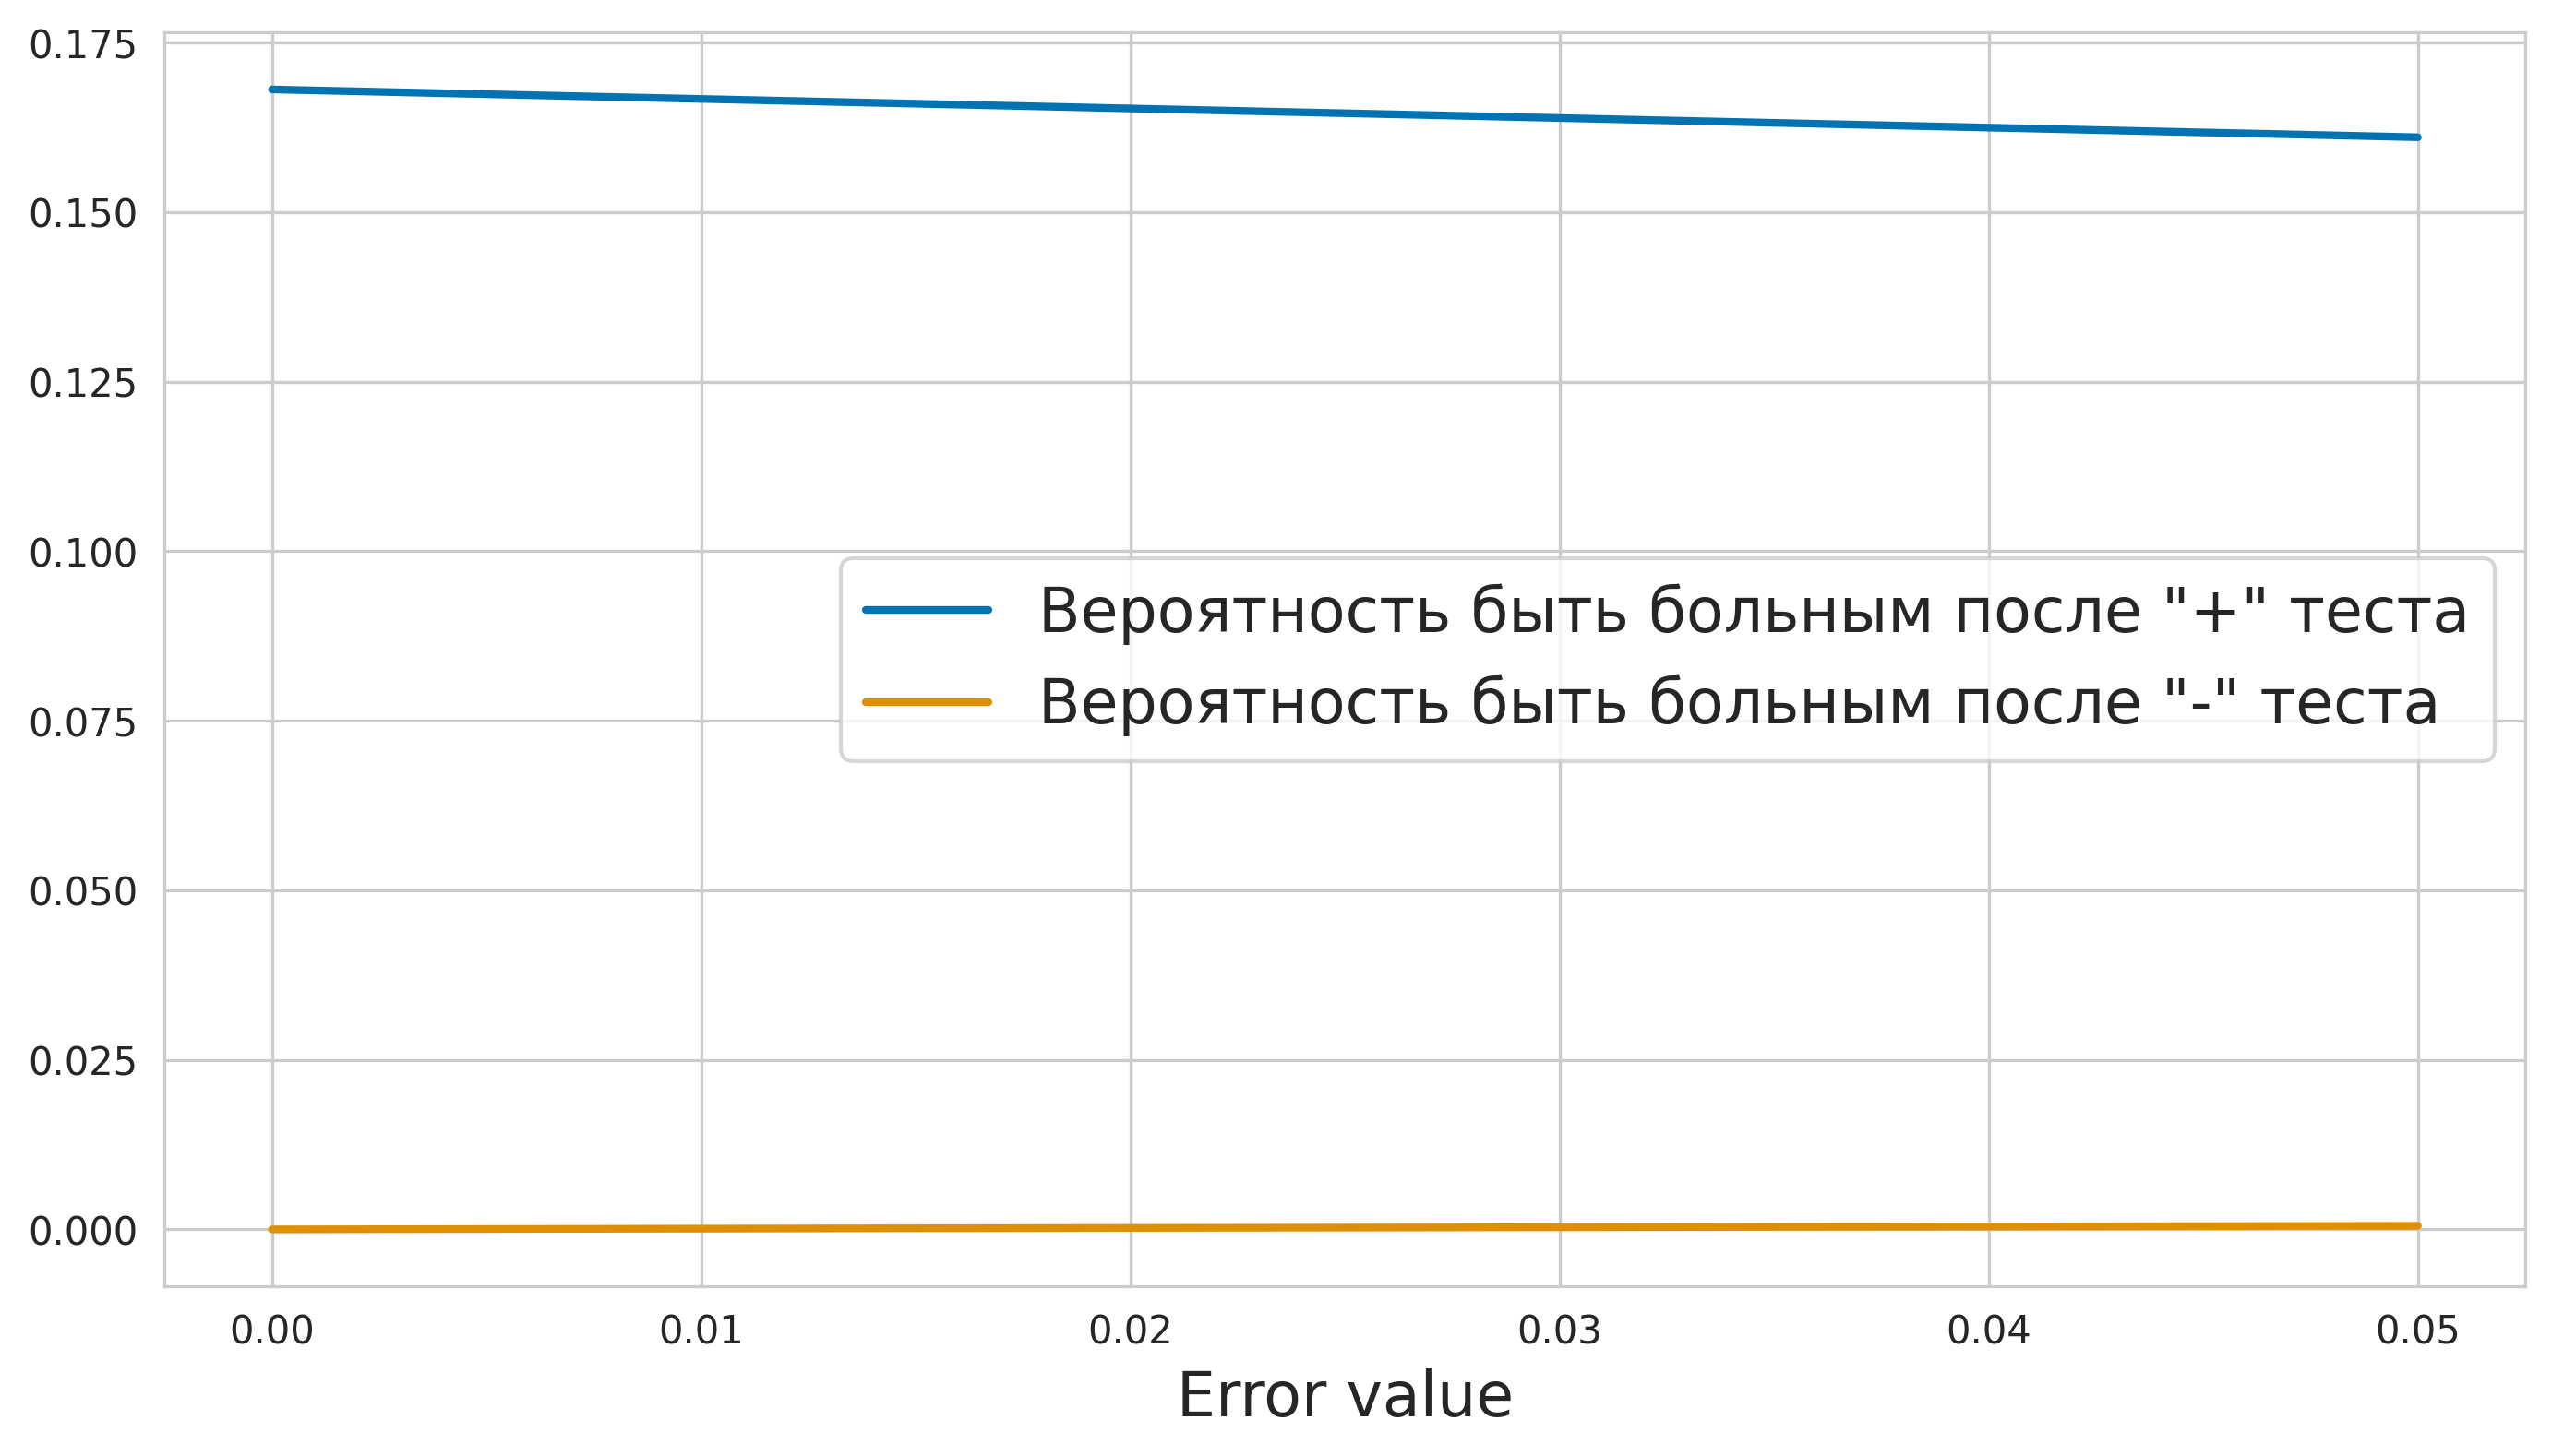

In [44]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 0.06, 0.01)
ys_one = vector_posterior(1, prior_prob=0.01, f_neg_err=xs, f_pos_err=0.05)
ys_zero = vector_posterior(0, prior_prob=0.01, f_neg_err=xs, f_pos_err=0.05)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label='Вероятность быть больным после "+" теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность быть больным после "-" теста')
ax.set_xlabel('Error value', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()


1. Шанс быть больным при положительном тесте при уменьшении вероятности ложно-отрицательных результатов увеличился 16.10% до 16.80%.
2. Шанс быть больным при отрицательном тесте при уменьшении вероятности ложно-отрицательных результатов уменьшился с 0.053% до 0%.

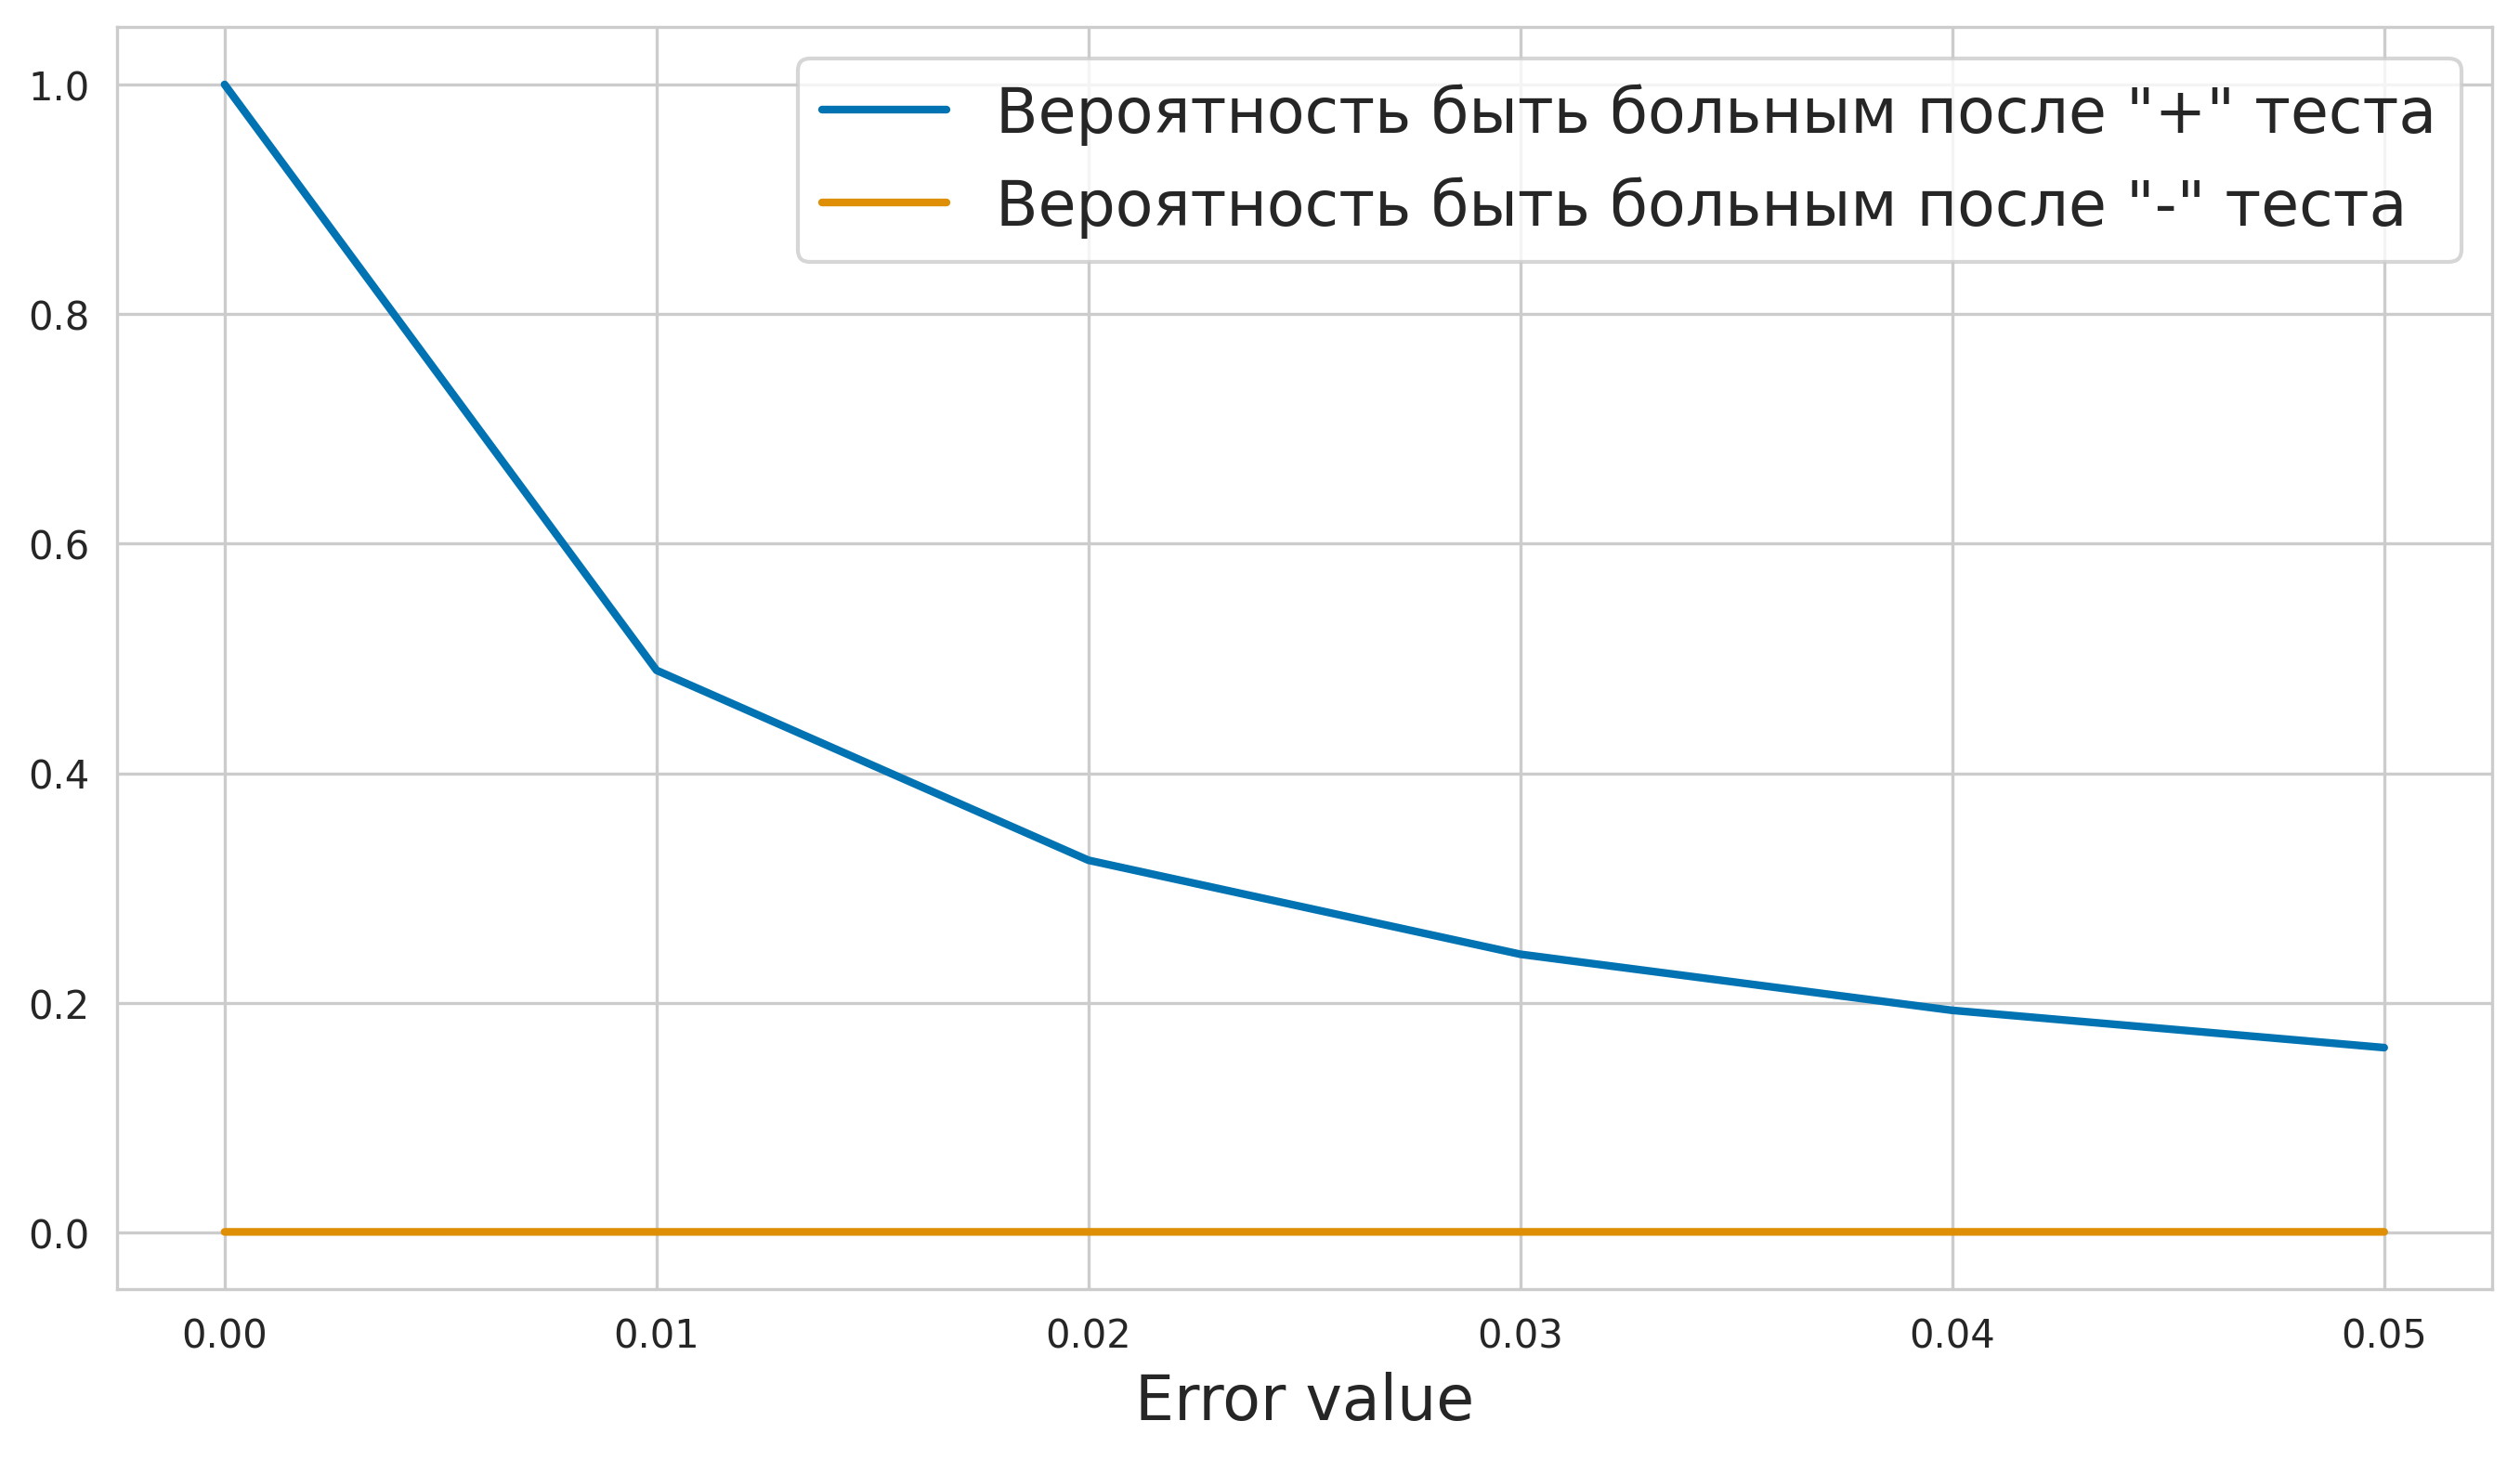

In [46]:
vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'test_success'])
xs = np.arange(0, 0.06, 0.01)
ys_one = vector_posterior(1, prior_prob=0.01, f_neg_err=0.05, f_pos_err=xs)
ys_zero = vector_posterior(0, prior_prob=0.01, f_neg_err=0.05, f_pos_err=xs)

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.plot(xs, ys_one, linewidth=2, label='Вероятность быть больным после "+" теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность быть больным после "-" теста')
ax.set_xlabel('Error value', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
plt.show()


1. Шанс быть больным при положительном тесте при уменьшении вероятности ложно-положительных результатов увеличился 16.10% до 100%.
2. Шанс быть больным при отрицательном тесте при уменьшении вероятности ложно-положительных результатов уменьшился с 0.053% до 0.05%.

### Вывод
Медикам лучше работать над уменьшениеv ошибки ложно-положительных результатов теста.

Уменьшение ошибки получения ложно-положительных результатов теста даст более сильное увеличение вероятности болезни при положительном результате. Это объясняется тем, что если мы уверены в том, что тест не показывает положительные результаты здоровым людям, значит мы более уверены в результате положительных тестов в целом.

Например, при ошибке p(x|~y) = 0.00001, близкой к нулю, вероятность болезни будет близка к 1.
p(y|x) = 0.01 * 0.95 / (0.01 * 95 + 0.99 * **0.00001**)

Уменьшение вероятности болезни при отрицательном тесте в обоих случаях 
изменяется менее значимо.